In [1]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingRandomSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pk

In [2]:
#Separem les dades
dataset = pd.read_csv("../data/datasetFinal.csv", header ='infer', low_memory=False)
y = dataset.MIS_Status
X = dataset.drop(['MIS_Status'], axis=1)
y = y[:100000]
X = X.iloc[:100000, :]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [3]:
x_train

,Unnamed: 0,Term,NoEmp,NewExist,UrbanRural,LowDoc,SBA_Appv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
31265,31555,7,5,1.0,1,0,8.517193,2,3,0,1,1
3537,3581,7,1,1.0,1,0,10.126631,1,3,0,0,1
57343,57906,5,6,1.0,2,0,12.834681,2,5,0,0,1
86296,87049,7,1,1.0,1,0,8.517193,3,2,1,1,0
52384,52917,2,7,1.0,2,0,10.819778,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46220,46712,15,2,2.0,0,1,9.729134,0,5,0,0,1
98804,99620,7,2,2.0,1,0,8.517193,2,4,0,1,0
48045,48548,7,5,1.0,1,0,10.819778,3,2,0,1,0
70053,70724,7,2,2.0,1,0,10.126631,3,3,1,1,0


In [4]:
criteris = ['gini', 'entropy']
for crit in criteris:
    clf = RandomForestClassifier(criterion=crit, max_depth=10, random_state=30, class_weight="balanced")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(crit)
    print(classification_report(y_test,y_pred))

gini
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6161
           1       0.97      0.89      0.93     18839

    accuracy                           0.89     25000
   macro avg       0.85      0.90      0.86     25000
weighted avg       0.91      0.89      0.90     25000

entropy
              precision    recall  f1-score   support

           0       0.71      0.90      0.80      6161
           1       0.97      0.88      0.92     18839

    accuracy                           0.89     25000
   macro avg       0.84      0.89      0.86     25000
weighted avg       0.90      0.89      0.89     25000



In [19]:
# Random Fores
RF = RandomForestClassifier(criterion="gini", random_state=30, class_weight="balanced")
RF.fit(x_train, y_train)
y_pred_RF= RF.predict(x_test)

# Linear SVC
SVC = LinearSVC(random_state=30, class_weight="balanced")
SVC.fit(x_train, y_train)
y_pred_SVC = SVC.predict(x_test)

# Decision Tree
DT = DecisionTreeClassifier(max_depth=10, random_state=30)
DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

# KNN
KNN = KNeighborsClassifier(n_neighbors = 5, n_jobs = 5)
KNN.fit(x_train, y_train)
y_pred_KNN = KNN.predict(x_test)

# Red Neuronal
RN = Sequential()
RN.add(Dense(12,input_shape=(12,),activation='relu'))
RN.add(Dense(1,activation='sigmoid'))
RN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']  )
RN.fit(x_train,y_train,epochs=5)
y_pred_RN = RN.predict(x_test)

E:\oriol\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\oriol\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Epoch 1/5
2344/2344 [==============================] - 13s 4ms/step - loss: 17.7297 - accuracy: 0.6683
Epoch 2/5
2344/2344 [==============================] - 13s 5ms/step - loss: 5.7945 - accuracy: 0.7011
Epoch 3/5
2344/2344 [==============================] - 13s 6ms/step - loss: 5.4701 - accuracy: 0.7178
Epoch 4/5
2344/2344 [==============================] - 9s 4ms/step - loss: 5.1574 - accuracy: 0.7313
Epoch 5/5
782/782 [==============================] - 2s 3ms/step


RANDOM FOREST


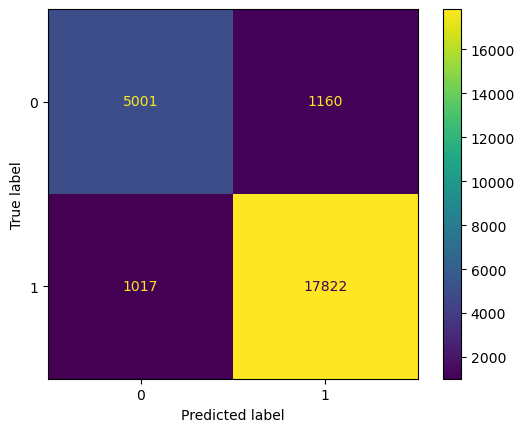

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6161
           1       0.94      0.95      0.94     18839

    accuracy                           0.91     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.91      0.91      0.91     25000


 LINEAR SVC


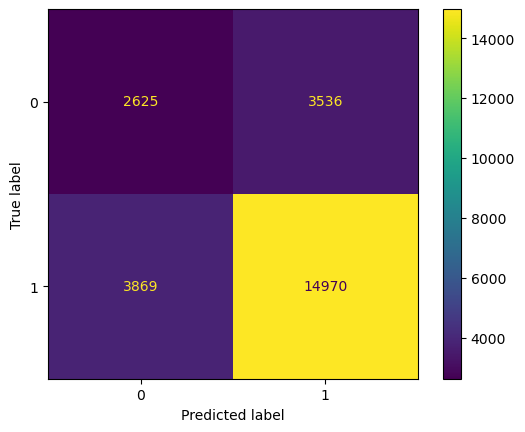

              precision    recall  f1-score   support

           0       0.40      0.43      0.41      6161
           1       0.81      0.79      0.80     18839

    accuracy                           0.70     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.71      0.70      0.71     25000


 DECISION TREE


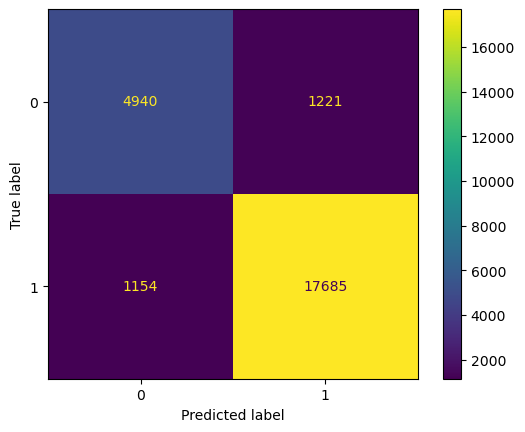

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6161
           1       0.94      0.94      0.94     18839

    accuracy                           0.91     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.90      0.91      0.90     25000


 KNN


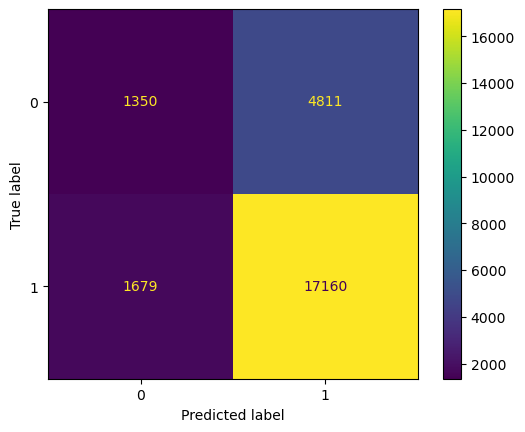

              precision    recall  f1-score   support

           0       0.45      0.22      0.29      6161
           1       0.78      0.91      0.84     18839

    accuracy                           0.74     25000
   macro avg       0.61      0.56      0.57     25000
weighted avg       0.70      0.74      0.71     25000


 RED NEURONAL


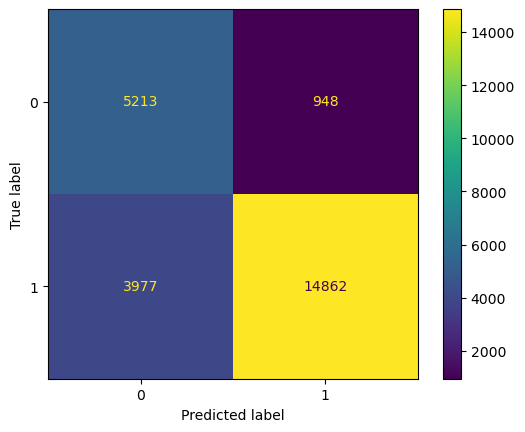

              precision    recall  f1-score   support

           0       0.57      0.85      0.68      6161
           1       0.94      0.79      0.86     18839

    accuracy                           0.80     25000
   macro avg       0.75      0.82      0.77     25000
weighted avg       0.85      0.80      0.81     25000

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-12 11:10:08         1406
metadata.json                                  2022-12-12 11:10:08         

In [24]:
# Random Forest
print("RANDOM FOREST")
cf=confusion_matrix(y_test, y_pred_RF, labels=RF.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=RF.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_RF))
filename = "RandomForest.sav"
pk.dump(RF, open(filename, 'wb'))

# Linear SVC
print("\n LINEAR SVC")
cf=confusion_matrix(y_test, y_pred_SVC, labels=SVC.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=SVC.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_SVC))
filename = "LinearSVC.sav"
pk.dump(SVC, open(filename, 'wb'))

# Decision Tree
print("\n DECISION TREE")
cf=confusion_matrix(y_test, y_pred_DT, labels=DT.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=DT.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_DT))
filename = "DecisiionTree.sav"
pk.dump(DT, open(filename, 'wb'))

# KNN
print("\n KNN")
cf=confusion_matrix(y_test, y_pred_KNN, labels=SVC.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=SVC.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_KNN))
filename = "KNN.sav"
pk.dump(KNN, open(filename, 'wb'))

#Red Neuronal
print("\n RED NEURONAL")
for x in range(len(y_pred_RN)):
    if y_pred_RN[x] >= 0.5:
        y_pred_RN[x]=1
    else:
        y_pred_RN[x]=0
cf=confusion_matrix(y_test, y_pred_RN, labels=SVC.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=SVC.classes_)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_RN))
filename = "RedNeuronal.sav"
pk.dump(RN, open(filename, 'wb'))

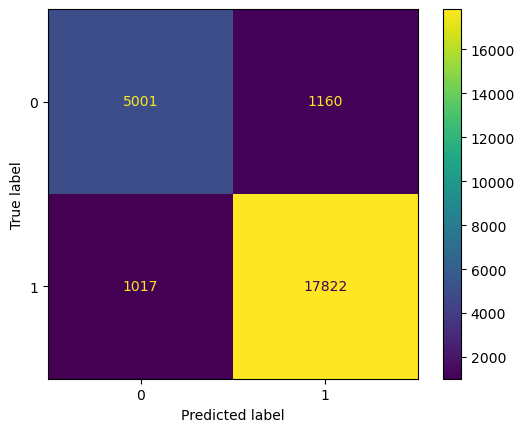

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6161
           1       0.94      0.95      0.94     18839

    accuracy                           0.91     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.91      0.91      0.91     25000



In [13]:
clf = RandomForestClassifier(criterion="gini", random_state=30, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

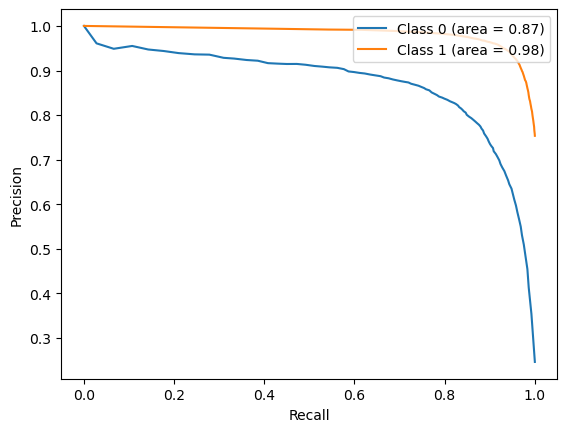

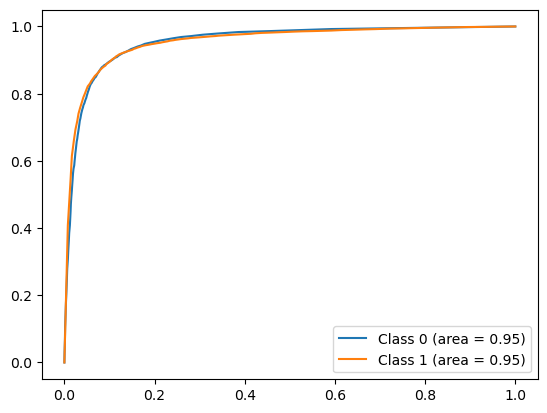

In [14]:
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_proba[:, i])

    plt.plot(recall[i], precision[i],
    label='Class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

<Figure size 1500x800 with 0 Axes>

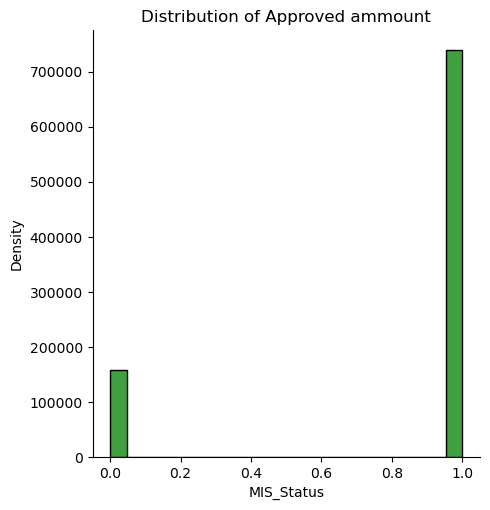

In [15]:
plt.figure(figsize=(15, 8))
sns.displot(dataset['MIS_Status'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

<Figure size 1500x800 with 0 Axes>

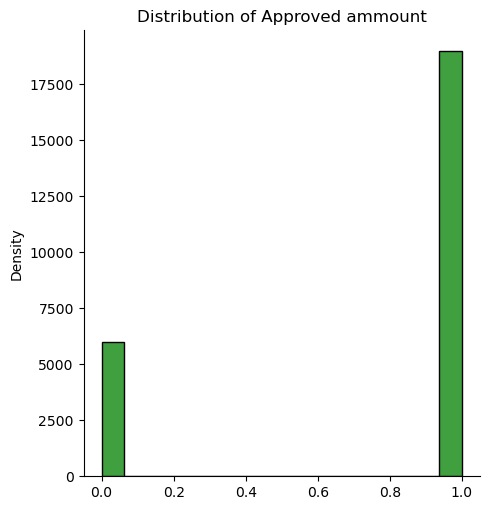

In [16]:
plt.figure(figsize=(15, 8))
sns.displot(y_pred, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [17]:
pred_percent_0 = len(y_pred[y_pred==0])/len(y_pred)
pred_percent_1 = 1-pred_percent_0
test_percent_0 = len(y_test[y_test==0])/len(y_test)
test_percent_1 = 1 - test_percent_0
print("               0    1")
print("% of predict: ",round(pred_percent_0, 2), round(pred_percent_1, 2))
print("% of test:    ",round(test_percent_0, 2), round(test_percent_1,2))

               0    1
% of predict:  0.24 0.76
% of test:     0.25 0.75
